# Лабораторная работа №3
## Цыпаев Владимир Николаевич
## Вариант 11
## Группа РИМ-181228

In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from scipy import signal
import scipy.stats as stats
from statsmodels.tsa import api as tsa
from math import factorial as fact
%matplotlib inline

Функция numpy.linalg.lstsq() решает задачу поиска наименьших квадратов для линейного матричного уравнения.

In [2]:
def create_linspace(start, stop, nsamples):
    return np.linspace(start, stop, num = nsamples)

def plot(X, t = [], title = '', f_dict = {}):
    plt.figure(figsize = (10, 6))
    plt.title(title)
    if len(t) > 0:
        plt.plot(t, X)
    else:
        plt.plot(X)
    if len(f_dict) > 0:
        legend_labels = []
        for f in f_dict["functions"]:
            plt.plot(t, f)
        for label in f_dict["titles"]:
            legend_labels.append(label)
        plt.legend(['Origin', *legend_labels])
    plt.show()

In [3]:
X = [18.47, 14.87, 21.51, 9.07, 16.02, 11.12, 23.45, 6.45, 14.21, 8.18, 14.50, 3.86, 10.14, 9.99, 14.47, 0.65, 8.97, 2.47, 12.58, 3.12, 6.81, 0.43, 4.65, 5.91]
X = np.asarray(X);
X.size == 24

True

In [4]:
t = create_linspace(0, 1, X.size)

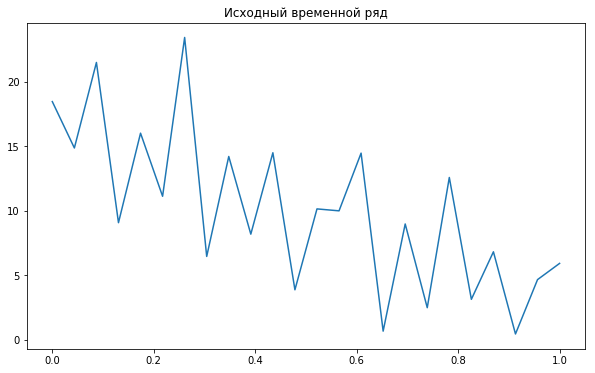

In [5]:
plot(X, t, title = 'Исходный временной ряд')

# Рассчитать регрессионную модель тренда первого порядка

In [6]:
def regression_model(A, t, rate = 1):
    rate += 1
    Y = A.transpose()
    X = np.ones((A.size, 1), dtype = float)
    
    for i in range(1, rate):
        X = np.concatenate((X, t.reshape(-1,1)**i), axis=1)
            
    B = np.linalg.lstsq(X,Y, rcond=None)
    B = B[0]
    return B


In [7]:
ones = np.ones((24, 1))
t_column = t.reshape((24,1))
t_regr = np.concatenate((ones, t_column), axis=1)
t_regr
B = np.linalg.lstsq(t_regr, X)
B = B[0]

C:\Users\tsypaev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


In [8]:
T = B[0] + B[1]*t

In [9]:
B[0]

17.058066666666676

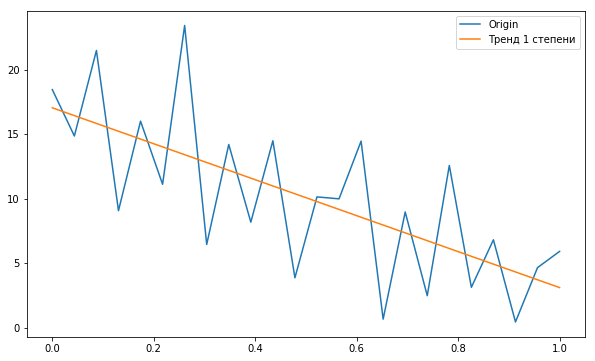

In [10]:
plot(X, t = t, f_dict = {"functions": [T], "titles": ['Тренд 1 степени'] })

# Проверка

### На основе линейной регресии из numpy

In [11]:
bb = np.polyfit(t, X, 1)
T_numpy = bb[1]+bb[0]*t

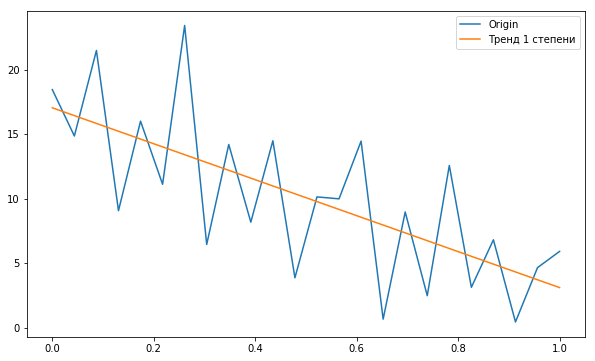

In [12]:
plot(X, t = t, f_dict = {"functions": [T_numpy], "titles": ['Тренд 1 степени'] })

### На основе линейной регресии из scipy stats

In [13]:
out = stats.linregress(t, X)
T_scipy = out.intercept + out.slope*t

In [14]:
print(out)

LinregressResult(slope=-13.9578, intercept=17.05806666666667, rvalue=-0.6841189524167706, pvalue=0.00022741475926521052, stderr=3.172650078786539)


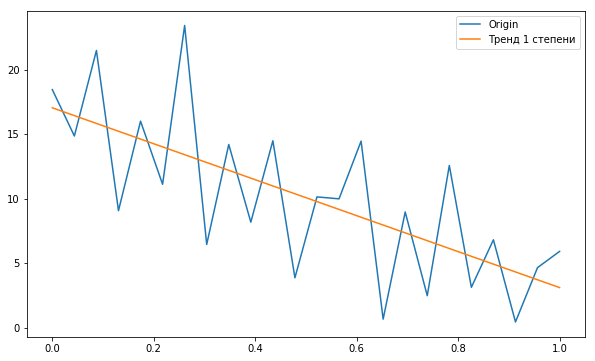

In [15]:
plot(X, t = t, f_dict = {"functions": [T_scipy], "titles": ['Тренд 1 степени'] })

### На основе подгонки кривых curve_fit из scipy.optimize

In [16]:
from scipy.optimize import curve_fit

def func(t, b0, b1):
    return b0 + b1 * t
popt, pcov = curve_fit(func, t, X)

In [17]:
print(popt, '\n', pcov)


[ 17.05806665 -13.95779997] 
 [[ 3.42817603 -5.0328542 ]
 [-5.0328542  10.06570847]]


### На основе библиотеки sklearn

In [18]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(t.reshape(-1,1), X)
print(reg.coef_, reg.intercept_)
print( reg.score(t.reshape(-1,1), X))

[-13.9578] 17.05806666666667
0.4680187410558193


In [19]:
yfit = reg.predict(t[:, np.newaxis])

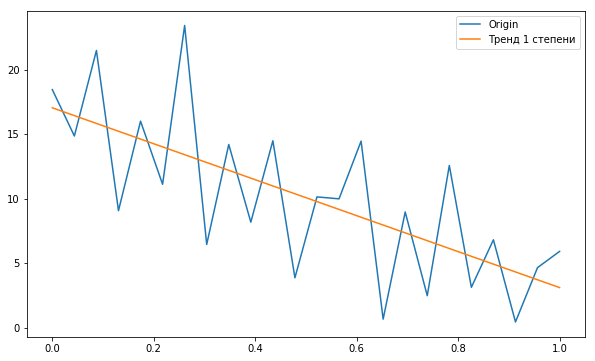

In [20]:
plot(X, t = t, f_dict = {"functions": [yfit], "titles": ['Тренд 1 степени'] })

### На основе statsmodel

In [21]:
import statsmodels.api as sm
x_ = sm.add_constant(t.reshape(-1,1))
smm = sm.OLS(X, x_)
res = smm.fit()

In [22]:
print(res.params)

[ 17.05806667 -13.9578    ]


# Рассчитать регрессионную модель тренда 2 и 3 порядка

### Матричный

In [23]:
B = regression_model(X, t)
T = B[0]+B[1]*t

B2 = regression_model(X, t, 2)
T2 = B2[0] + B2[1]*t + B2[2]*t**2

B3 = regression_model(X, t, 3)
T3 = B3[0] + B3[1]*t + B3[2]*t**2 + B3[3]*t**3

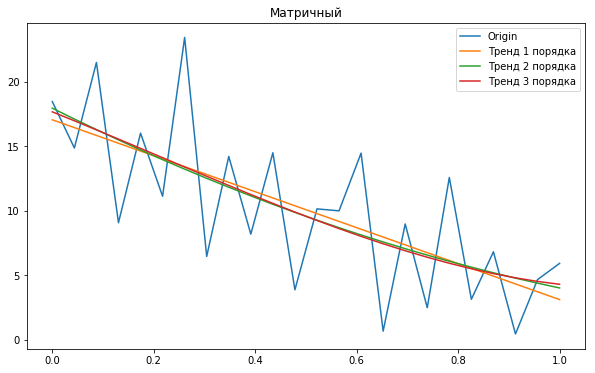

In [24]:
plot(X, t = t, title='Матричный', f_dict = {"functions": [T, T2, T3], "titles": ['Тренд 1 порядка', 'Тренд 2 порядка', 'Тренд 3 порядка'] })

### curve_fit

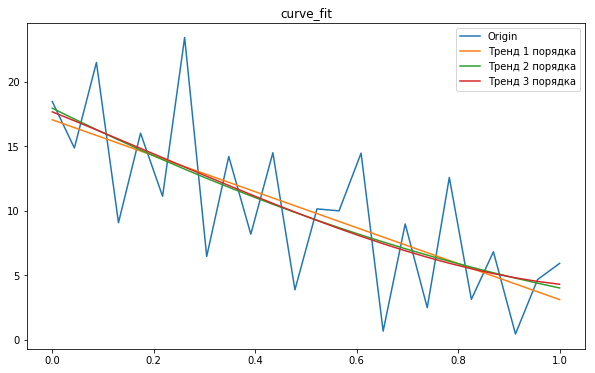

In [25]:
def func_2(t, b0, b1, b2):
    return b0 + b1 * t + b2 * t**2
popt_2, pcov = curve_fit(func_2, t, X)
def func_3(t, b0, b1, b2, b3):
    return b0 + b1 * t + b2 * t**2 + b3*t**3
popt_3, pcov = curve_fit(func_3, t, X)

plot(X, t = t, title='curve_fit', f_dict = {"functions": [func(t, *popt), func_2(t, *popt_2), func_3(t, *popt_3)], "titles": ['Тренд 1 порядка', 'Тренд 2 порядка', 'Тренд 3 порядка'] })

### polyfit

In [26]:
bb2 = np.polyfit(t, X, 2)
bb3 = np.polyfit(t, X, 3)
bb4 = np.polyfit(t, X, 4)

T1_polyfit = bb[1]+bb[0]*t
T2_polyfit = bb2[2]+(bb2[1])*t+(bb2[0])*(t**2)
T3_polyfit = bb3[3]+bb3[2]*t+bb3[1]*t**2+bb3[0]*t**3

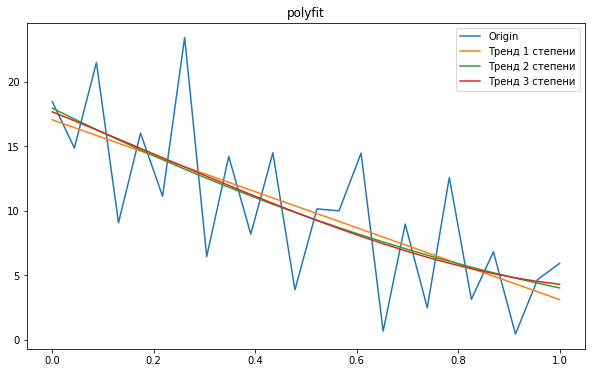

In [27]:
plot(X, t = t, title='polyfit', f_dict = {"functions": [T1_polyfit, T2_polyfit, T3_polyfit], "titles": ['Тренд 1 степени', 'Тренд 2 степени', 'Тренд 3 степени'] })

In [28]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def linear_regression(X, degree = 1):
    yfit = reg.predict(t[:, np.newaxis])
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(yfit.reshape(-1, 1), X)
    y_plot = model.predict(yfit.reshape(-1, 1))
    return y_plot

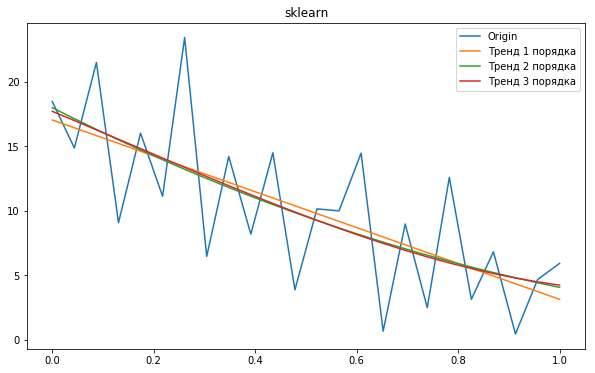

In [29]:
plot(X, t = t, title='sklearn', f_dict = {"functions": [linear_regression(X, 1), linear_regression(X, 2), linear_regression(X, 3)], "titles": ['Тренд 1 порядка', 'Тренд 2 порядка', 'Тренд 3 порядка'] })

# Экспоненциальный тренд

### curve_fit

In [30]:
def func_exp(x, a, b):
    return a * np.exp(-b * x)

popt, pcov = curve_fit(func_exp, t, X)

In [31]:
popt

array([18.5579504 ,  1.38694779])

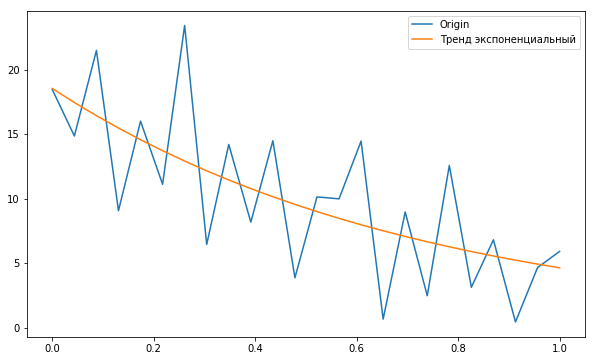

In [32]:
plot(X, t = t, f_dict = {"functions": [func_exp(t, *popt)], "titles": ['Тренд экспоненциальный'] })

### Матричный

Коэффициенты B:  [2.96250357 1.93448057]


C:\Users\tsypaev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


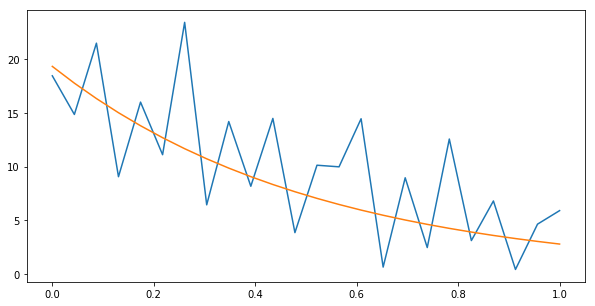

In [33]:
Xx = np.ones((2,24)) 
Xx[1] = -t 
B_exp = np.linalg.lstsq(Xx.T,np.log(X)) 
B_exp = B_exp[0] 
plt.figure(figsize = (10, 5)) 
plt.plot(t, X) # строим исходный ВР 
plt.plot(t, np.exp(B_exp[0])*np.exp( - B_exp[1]*t)) 
plt.show()

# Тренд методом сглаживания

In [34]:
def smooth(x, window_len): 
    if window_len<3:
        return x
    s=np.r_[2*x[0]-x[window_len-1::-1], x, 2*x[-1]-x[-1:-window_len:-1]]
    w=np.ones(window_len, 'd')
    y=np.convolve(w/w.sum(), s, mode='same')
    return y[window_len:-window_len+1]

In [35]:
smooth_3 = smooth(X, 3)
smooth_7 = smooth(X, 7)
smooth_11 = smooth(X, 11)

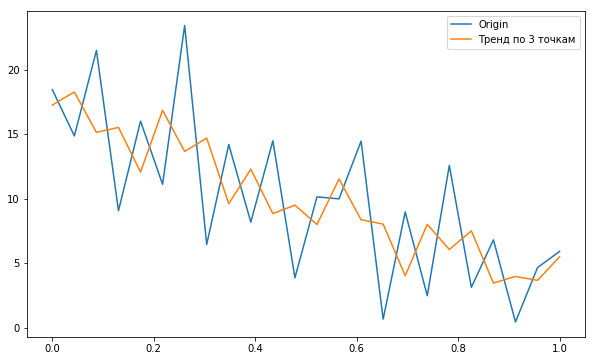

In [36]:
plot(X, t = t, f_dict = {"functions": [smooth_3], "titles": ['Тренд по 3 точкам'] })

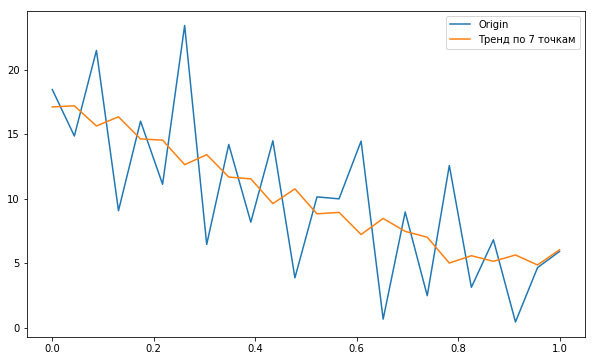

In [37]:
plot(X, t = t, f_dict = {"functions": [smooth_7], "titles": ['Тренд по 7 точкам'] })

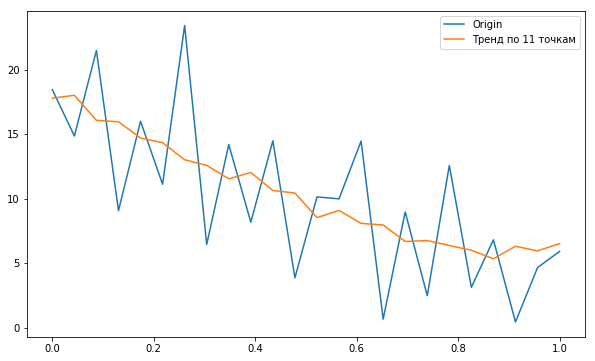

In [38]:
plot(X, t = t, f_dict = {"functions": [smooth_11], "titles": ['Тренд по 11 точкам'] })

# Собственная функция сглаживания

In [39]:
def mysmooth(X, window_len):
    half_window=window_len//2
    X=np.concatenate([[X[0]]*half_window, X, [X[-1]]*half_window])
    smoothed=[]
    
    for i in range(half_window,len(X)-half_window):
        smoothed.append(X[i-half_window:i+1+half_window].sum()/window_len)
    
    return np.array(smoothed)

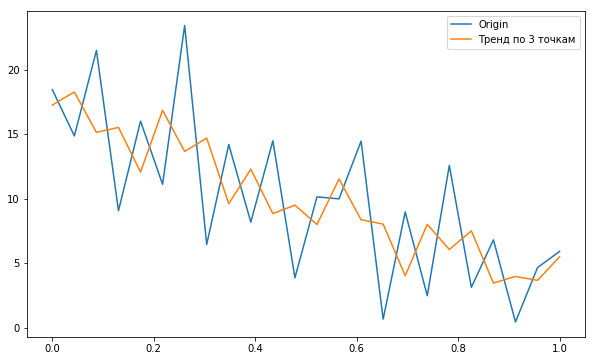

In [40]:
plot(X, t = t, f_dict = {"functions": [mysmooth(X,3)], "titles": ['Тренд по 3 точкам'] })

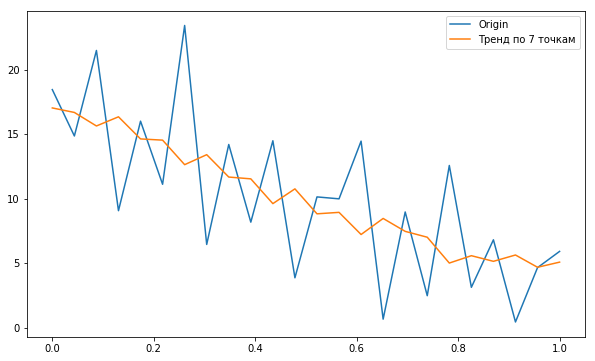

In [41]:
plot(X, t = t, f_dict = {"functions": [mysmooth(X,7)], "titles": ['Тренд по 7 точкам'] })

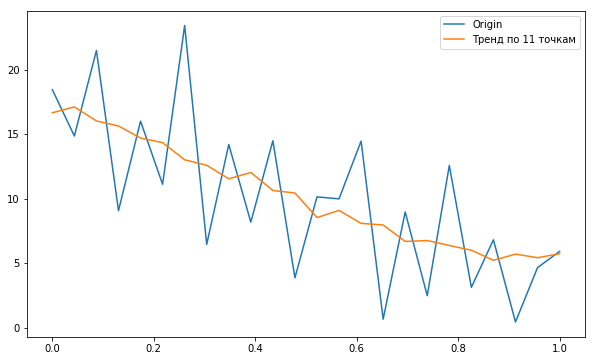

In [42]:
plot(X, t = t, f_dict = {"functions": [mysmooth(X,11)], "titles": ['Тренд по 11 точкам'] })

In [43]:
def smooth_exp(data, alpha): 

    smooth_data = [(data[0] + data[1]) / 2] 

    for i in range(1, len(data)): 
        w1 = smooth_data[i-1] 
        smoothed_x = (1 - alpha) * w1 + alpha * data[i] 
        smooth_data.append(smoothed_x) 

    return smooth_data

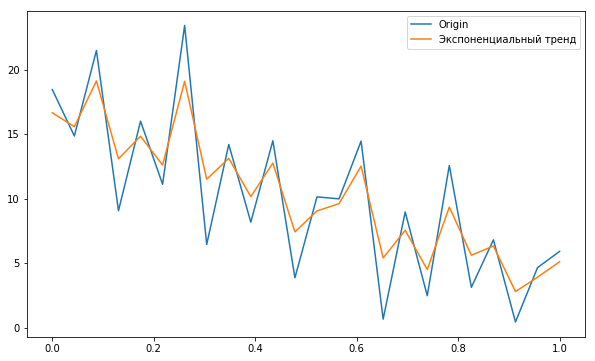

In [44]:
plot(X, t = t, f_dict = {"functions": [smooth_exp(X, 0.6)], "titles": ['Экспоненциальный тренд'] })